In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sklearn import metrics

In [6]:
df=pd.read_csv('medical_cost_data.csv')

In [7]:
df.shape

(1338, 7)

In [8]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
# missing or null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
# one hot encoding
df = pd.get_dummies(df,drop_first=True)

In [13]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [14]:
df.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


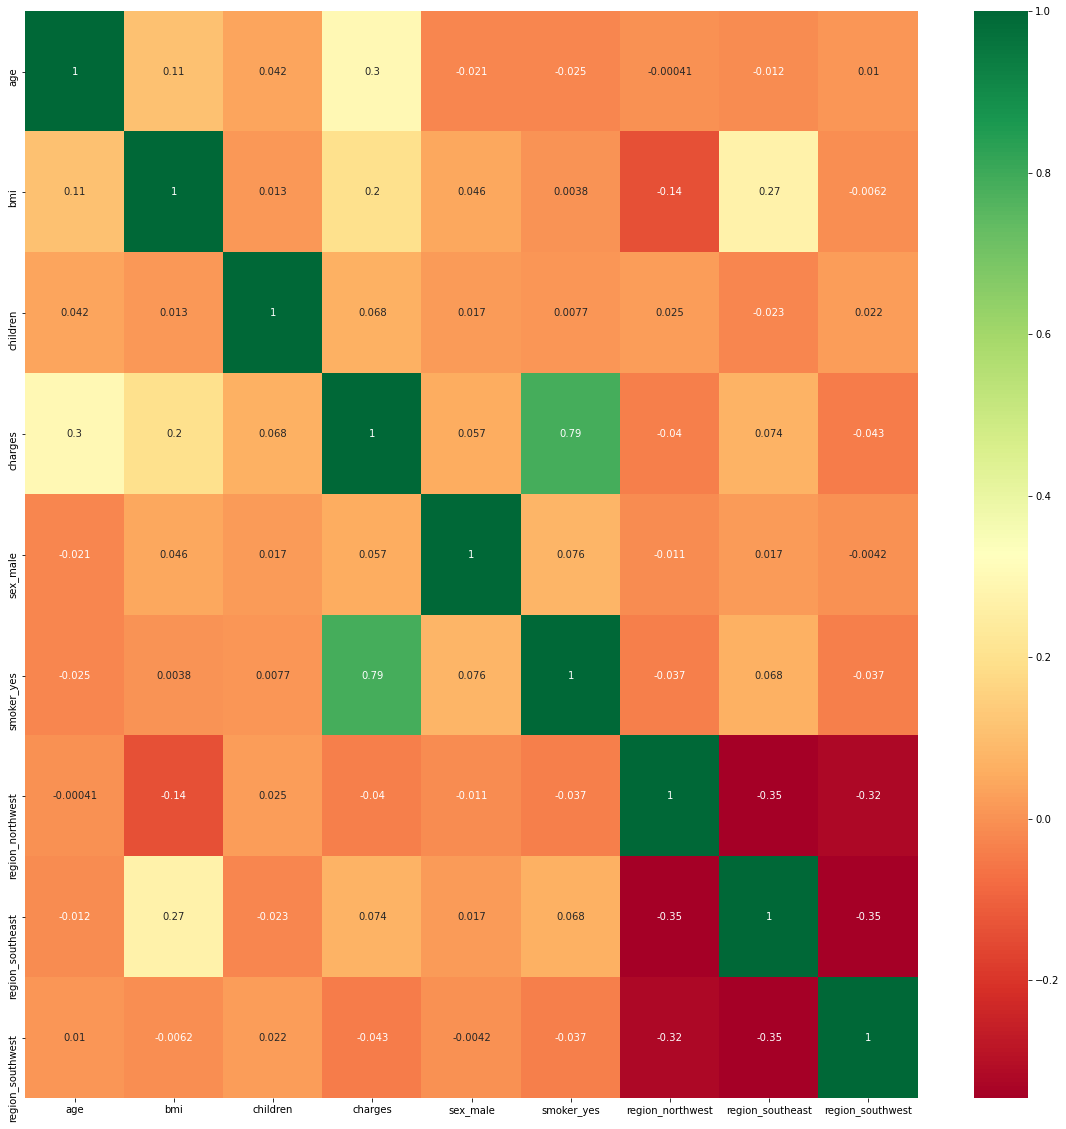

In [15]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
x = df.iloc[:,4:]
x['age'] = df.iloc[:,0]
x['bmi'] = df.iloc[:,1]
x['children'] = df.iloc[:,2]

In [17]:
y = df.iloc[:,3]

In [18]:
x.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
0,0,1,0,0,1,19,27.900,0
1,1,0,0,1,0,18,33.770,1
2,1,0,0,1,0,28,33.000,3
3,1,0,1,0,0,33,22.705,0
4,1,0,1,0,0,32,28.880,0


In [19]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [20]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [21]:
print(model.feature_importances_)

[0.01017933 0.62059197 0.00900119 0.00860353 0.00626473 0.12961816
 0.19194735 0.02379374]


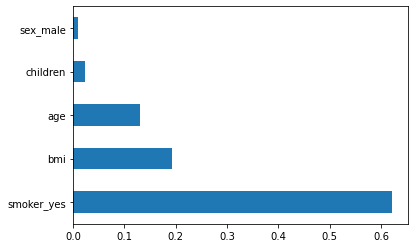

In [22]:
feat_importances = pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [24]:
x_train.shape

(1070, 8)

In [25]:
# Randomized search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Max number of levels in a tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

# Max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# minimum number of samples required at each lead node
min_samples_leaf = [1,2,5,10]

In [26]:
# create the random grid
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [27]:
# use the random grid to search for best hyperparameters
# creating the base model to tune
rf = RandomForestRegressor()

In [28]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=1)

In [29]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [30]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20}

In [32]:
predictions = rf_random.predict(x_test)

In [33]:
predictions

array([17009.66660016,  7023.02258999,  7269.37125476, 13475.36677317,
        6082.61362705, 12205.17495559,  3291.7471102 ,  7614.34669622,
       39088.39609843,  6821.0714834 ,  4816.63328269,  6924.50929139,
        5963.1209221 ,  9771.31844605,  8151.42077272, 47049.34683766,
        5631.89757938, 19478.9712438 , 19160.76064596,  2470.76228802,
       12164.38936816,  8049.57945532,  5034.28168152,  2742.42934598,
       12370.85634865, 27519.1593402 ,  7579.09204337,  2362.90458515,
        7316.99353986,  8133.77335826, 10207.45594924,  9836.87986964,
       46884.19605734, 36306.98384549,  7240.32309689, 35349.88352234,
        1885.96751753, 14337.21636211,  5678.67395015,  6098.5085241 ,
       11930.57239127, 20253.76954964, 13053.87650317,  3457.94450602,
       12379.198063  , 22765.52967923,  5514.84873876, 36808.96117769,
        7454.02298091, 16348.48279843,  5661.10813239, 35495.91997578,
        4244.99255811, 12226.14555842,  6811.96448599, 39144.8972998 ,
      

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

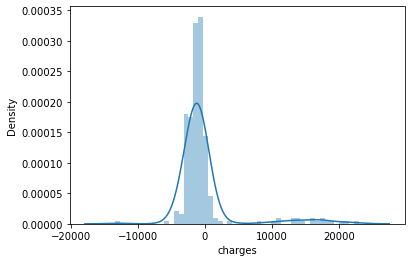

In [34]:
sns.distplot(y_test-predictions)

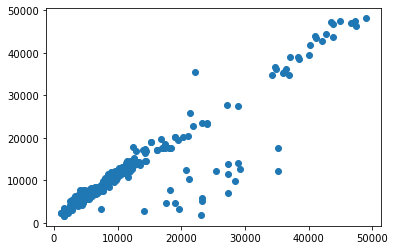

In [35]:
plt.scatter(y_test,predictions)

In [40]:
# Accuracy
print(metrics.r2_score(y_test,predictions))

0.8228475157519684


In [41]:
# File to store the data
file = open('RandomForestRegressor.pkl','wb')

# Dump information to that file
pickle.dump(rf_random,file)